<a href="https://colab.research.google.com/github/Felipe-Gomes-Amorim/An-lise-de-Risco-Acad-mico/blob/main/An%C3%A1lise_de_Risco_Acad%C3%AAmico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e Criação da tabela

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


sns.set(style='whitegrid')
# Definindo o número de alunos
n_students = 2000

# Criação das variáveis com distribuição aleatória
data = {
    "Student_ID": range(1, n_students + 1),
    "Attendance": np.random.normal(80, 10, n_students),  # Presença média em percentual
    "Assignments_Completed": np.random.randint(0, 20, n_students),  # Tarefas entregues
    "Study_Hours_Per_Week": np.random.normal(15, 5, n_students),  # Horas de estudo semanais
    "Previous_Test_Score": np.random.normal(70, 15, n_students),  # Nota de prova anterior em percentual
    "Forum_Participation": np.random.normal(30, 10, n_students),  # Participação em fóruns
    "Age": np.random.randint(18, 35, n_students),  # Idade dos alunos
    "Socioeconomic_Status": np.random.choice(["Low", "Medium", "High"], n_students),  # Status socioeconômico
}

# Conversão para DataFrame
df = pd.DataFrame(data)

# Lógica para atribuir o nível de risco de desempenho
conditions = [
    (df["Attendance"] < 70) & (df["Study_Hours_Per_Week"] < 10) & (df["Previous_Test_Score"] < 50),
    (df["Attendance"] >= 70) & (df["Attendance"] < 85) & (df["Study_Hours_Per_Week"] >= 10) & (df["Previous_Test_Score"] >= 50),
    (df["Attendance"] >= 85) & (df["Study_Hours_Per_Week"] >= 15) & (df["Previous_Test_Score"] >= 60)
]

# Níveis de risco baseados nas condições definidas
risk_levels = ["Alto Risco", "Médio Risco", "Baixo Risco"]
df["Risk_Level"] = np.select(conditions, risk_levels, default="Médio Risco")



df.head()

,Student_ID,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,1,81.806209,5,21.000616,55.226194,29.615737,20,Low,Médio Risco
1,2,82.503351,8,10.768570,77.152925,30.644826,21,Low,Médio Risco
2,3,91.038866,2,12.508832,102.861750,66.341331,33,Medium,Médio Risco
3,4,70.517974,5,21.563267,98.447568,18.361875,18,Medium,Médio Risco
4,5,86.596164,7,16.424921,72.924652,28.084518,23,Low,Baixo Risco


In [ ]:
ordinal_encoder = OrdinalEncoder(categories=[["Low", "Medium", "High"]])
df["Socioeconomic_Status"] = ordinal_encoder.fit_transform(df[["Socioeconomic_Status"]])

ordinal_encoder = OrdinalEncoder(categories=[["Baixo Risco", "Médio Risco", "Alto Risco"]])
df["Risk_Level"] = ordinal_encoder.fit_transform(df[["Risk_Level"]])
df.drop('Student_ID', axis=1, inplace=True)
df.head()

,Attendance,Assignments_Completed,Study_Hours_Per_Week,Previous_Test_Score,Forum_Participation,Age,Socioeconomic_Status,Risk_Level
0,81.806209,5,21.000616,55.226194,29.615737,20,0.0,1.0
1,82.503351,8,10.768570,77.152925,30.644826,21,0.0,1.0
2,91.038866,2,12.508832,102.861750,66.341331,33,1.0,1.0
3,70.517974,5,21.563267,98.447568,18.361875,18,1.0,1.0
4,86.596164,7,16.424921,72.924652,28.084518,23,0.0,0.0


# K-Means





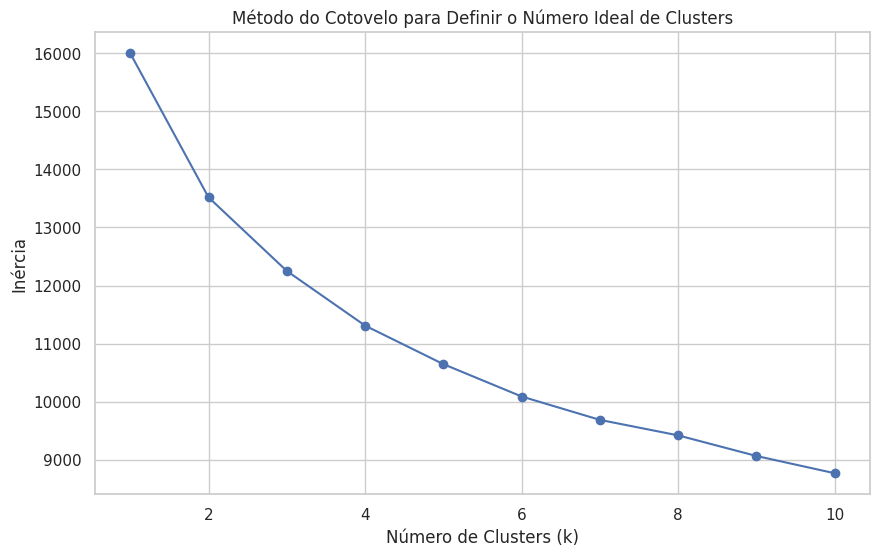

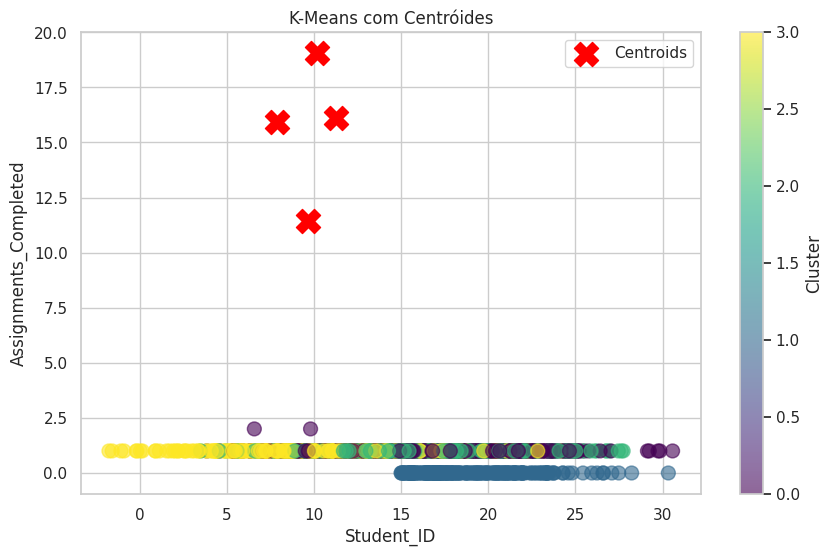

In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Calculando o método do cotovelo
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Visualizando o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Definir o Número Ideal de Clusters')
plt.show()

# Inicializando o K-Means com k=4
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)


# Ajustando o modelo e criando a coluna 'Cluster'
df['Cluster'] = kmeans.fit_predict(data_scaled)
df.head()

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Study_Hours_Per_Week'], df['Risk_Level'], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)

# Obtendo os centróides e invertendo a normalização
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 1], centroids[:, 2], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means com Centróides')
plt.xlabel('Student_ID')
plt.ylabel('Assignments_Completed')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()

In [ ]:
print(kmeans[:,1])

TypeError: 'KMeans' object is not subscriptable

# Random Forest

## Dataset

In [ ]:
# Dividir o dataset em treino e teste
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Modelo de Árvore de Decisão
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Fazer previsões
y_pred_dtree = dtree.predict(X_test)

# Avaliar o modelo
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
dtree_report = classification_report(y_test, y_pred_dtree)
dtree_accuracy, dtree_report


KeyError: "['species'] not found in axis"

In [ ]:
print(kmeans)